First Importing all the Necessary libraries

In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-04-19 15:10:26.650692: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 15:10:29.352809: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading of the data set 

In [2]:

exam_df = pd.read_csv('exams.csv')

Separating of the features and the target variable

In [3]:

y = exam_df['math score']
features = ['reading score', 'writing score']
X = exam_df[features]

Splitting of the data into training and Validation sets

In [4]:

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=400)

Initialize and train various models

In [5]:

models = {
    'Random Forest': RandomForestRegressor(random_state=1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=1),
    'Support Vector Machine': SVR(),
}
for name, model in models.items():
    model.fit(train_X, train_y)
    predictions = model.predict(val_X)
    mae = mean_absolute_error(predictions, val_y)
    print(f"{name} MAE: {mae}")

Random Forest MAE: 7.884305662962641
Gradient Boosting MAE: 7.251805446162537
Support Vector Machine MAE: 7.073221628608613


 Neural Network Model

In [6]:

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_absolute_error')
nn_model.fit(train_X, train_y, epochs=50, verbose=0)
nn_predictions = nn_model.predict(val_X)
nn_mae = mean_absolute_error(nn_predictions, val_y)
print(f"Neural Network MAE: {nn_mae}")

/home/masamba/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-19 15:10:32.204221: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Neural Network MAE: 7.007719596862793


 Plotting Actual vs. Predicted

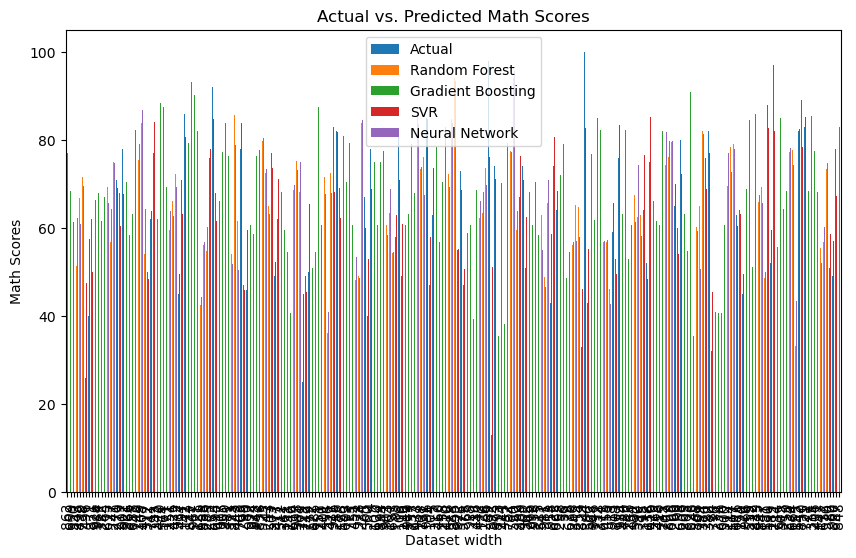

In [7]:

actual_pred_df = pd.DataFrame({'Actual': val_y, 'Random Forest': models['Random Forest'].predict(val_X),
                               'Gradient Boosting': models['Gradient Boosting'].predict(val_X),
                               'SVR': models['Support Vector Machine'].predict(val_X),
                               'Neural Network': nn_predictions.flatten()})
actual_pred_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Dataset width')
plt.ylabel('Math Scores')
plt.title('Actual vs. Predicted Math Scores')
plt.legend()
plt.show()

Calculate the mean of actual and predicted scores

In [8]:
mean_actual = actual_pred_df['Actual'].mean()
mean_rf = actual_pred_df['Random Forest'].mean()
mean_gb = actual_pred_df['Gradient Boosting'].mean()
mean_svr = actual_pred_df['SVR'].mean()
mean_nn = actual_pred_df['Neural Network'].mean()


Create a DataFrame for mean scores

In [9]:

mean_df = pd.DataFrame({
    'Model': ['Actual', 'Random Forest', 'Gradient Boosting', 'SVR', 'Neural Network'],
    'Mean Score': [mean_actual, mean_rf, mean_gb, mean_svr, mean_nn]
})

Plotting Mean Scores as a Pie Chart

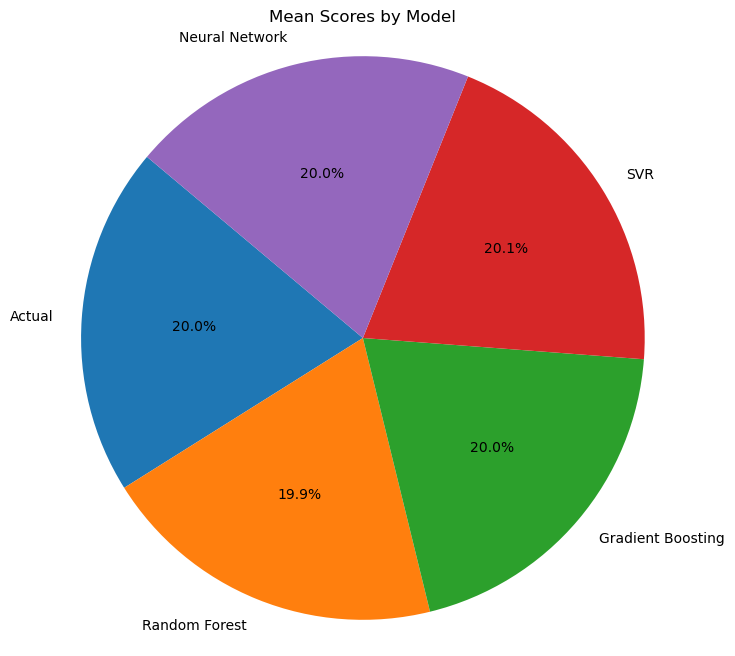

In [10]:

plt.figure(figsize=(8, 8))
plt.pie(mean_df['Mean Score'], labels=mean_df['Model'], autopct='%1.1f%%', startangle=140)
plt.title('Mean Scores by Model')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()